Required number of trays: 15


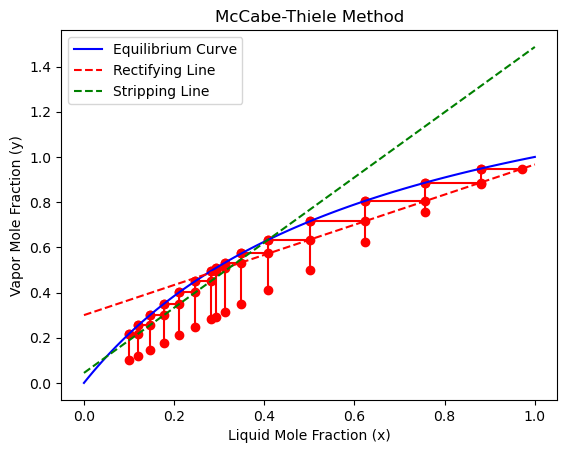

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def equilibrium_curve(alpha, x):
    """Calculate the equilibrium curve using relative volatility."""
    return (alpha * x) / (1 + (alpha - 1) * x)

def operating_lines(xD, xW, zF, q, R, L, W):
    """Calculate the rectifying and stripping section operating lines."""
    
    # Rectifying section: y = (R/(R+1))x + (xD/(R+1))
    rectifying_slope = R / (R + 1)
    rectifying_intercept = xD / (R + 1)
    
    # Stripping section: y = (L / (L - W)) * x + (W / (L - W))
    strip_slope = L / (L - W)
    strip_intercept = W / (L - W)*xW
    
    return rectifying_slope, rectifying_intercept, strip_slope, strip_intercept

def tray_by_tray_method(xD, xW, zF, alpha, q, R, L, W):
    """Perform McCabe-Thiele tray-by-tray stepping to find the number of trays."""
    
    # Generate x values for equilibrium and operating lines
    x_vals = np.linspace(0, 1, 100)
    y_eq = equilibrium_curve(alpha, x_vals)
    rect_slope, rect_int, strip_slope, strip_int = operating_lines(xD, xW, zF, q, R, L, W)
    
    # Start stepping procedure from distillate composition
    x = xW + 0.000001
    trays = 0
    max_trays = 100  # Prevent infinite loop
    
    while x > xW and abs(x - xW) > 1e-6 and trays < max_trays and x< xD:
        trays += 1
        
        # Step 1: Move vertically DOWN to the equilibrium curve
        y = equilibrium_curve(alpha, x)
        plt.plot([x, x], [x, y], 'ro-')  # Vertical line
        
        # Step 2: Move LEFT to the operating line
        if y > rect_slope * x + rect_int:  # Rectifying section
            x_new = (y - rect_int) / rect_slope
        else:  # Stripping section
            x_new = (y - strip_int) / strip_slope
        
        plt.plot([x, x_new], [y, y], 'ro-')  # Horizontal line
        x = x_new  # Update x for next step
    
    if trays >= max_trays:
        print("Warning: Tray calculation did not converge within max iterations.")
    
    return trays
# Example input values
xD = 0.9  # Distillate composition
xW = 0.1  # Bottoms composition
zF = 0.5  # Feed composition
alpha = 2.5  # Relative volatility
q = 0.5  # Feed quality
R = 2  # Reflux ratio
L = 163  # Liquid flow rate in stripping section
W = 50  # Bottoms flow rate

# Compute required trays
num_trays = tray_by_tray_method(xD, xW, zF, alpha, q, R, L, W)
print(f"Required number of trays: {num_trays}")

# Plot equilibrium curve and operating lines
x_vals = np.linspace(0, 1, 100)
y_eq = equilibrium_curve(alpha, x_vals)
rect_slope, rect_int, strip_slope, strip_int = operating_lines(xD, xW, zF, q, R, L, W)
y_rect = rect_slope * x_vals + rect_int
y_strip = strip_slope * x_vals + strip_int

plt.plot(x_vals, y_eq, label='Equilibrium Curve', color='blue')
plt.plot(x_vals, y_rect, label='Rectifying Line', linestyle='dashed', color='red')
plt.plot(x_vals, y_strip, label='Stripping Line', linestyle='dashed', color='green')
plt.xlabel('Liquid Mole Fraction (x)')
plt.ylabel('Vapor Mole Fraction (y)')
plt.legend()
plt.title('McCabe-Thiele Method')
plt.show()
